In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns
from numpy.linalg import inv
from numpy.linalg import norm

In [2]:
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['MEDV'] = boston.target

In [3]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [4]:
training_data, testing_data = train_test_split(df, test_size=0.2)

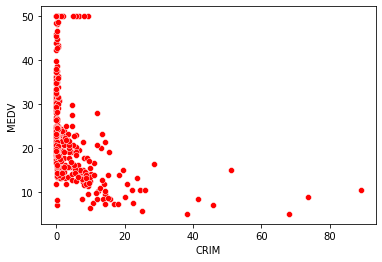

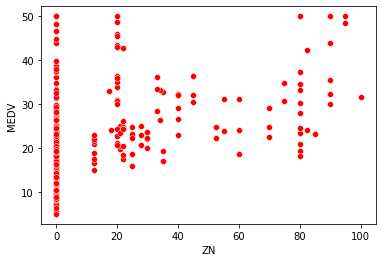

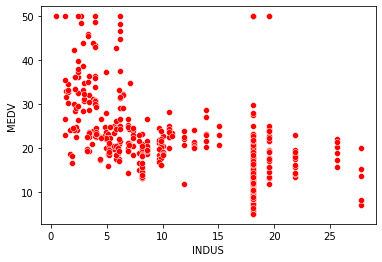

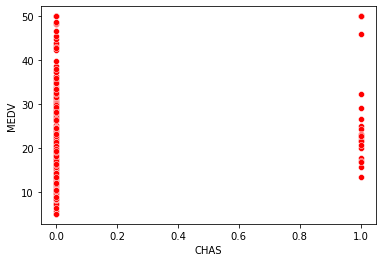

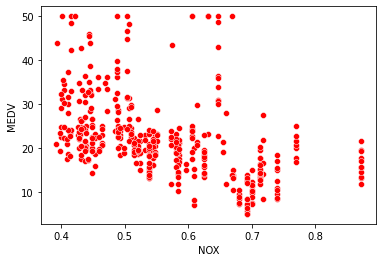

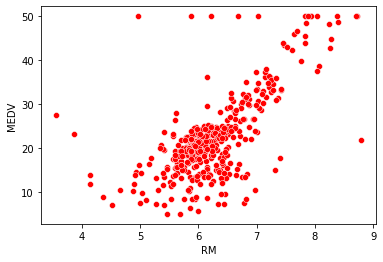

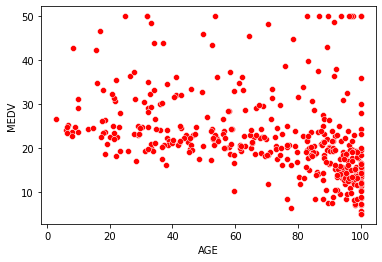

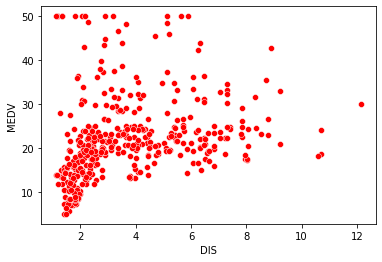

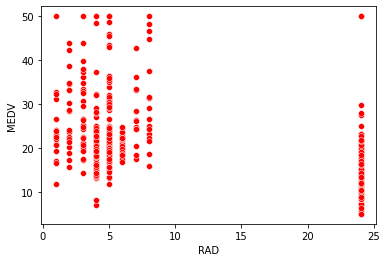

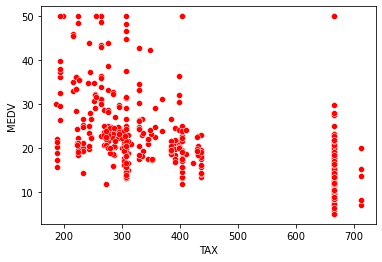

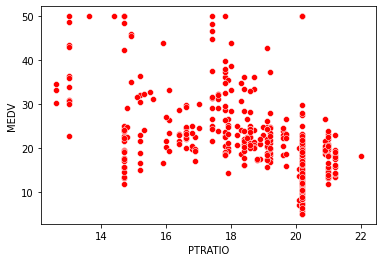

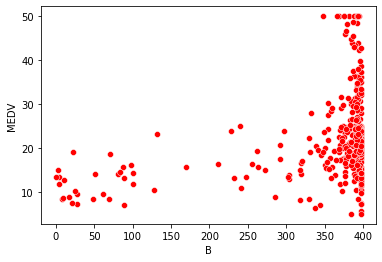

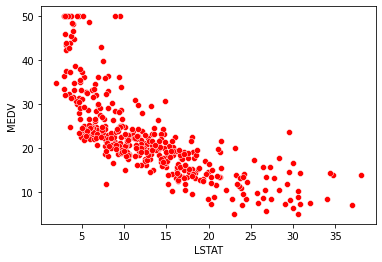

In [5]:
for i in range(len(training_data.columns)-1):
    sns.scatterplot(x = training_data[training_data.columns[i]], y = training_data['MEDV'], color = "red")
    plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

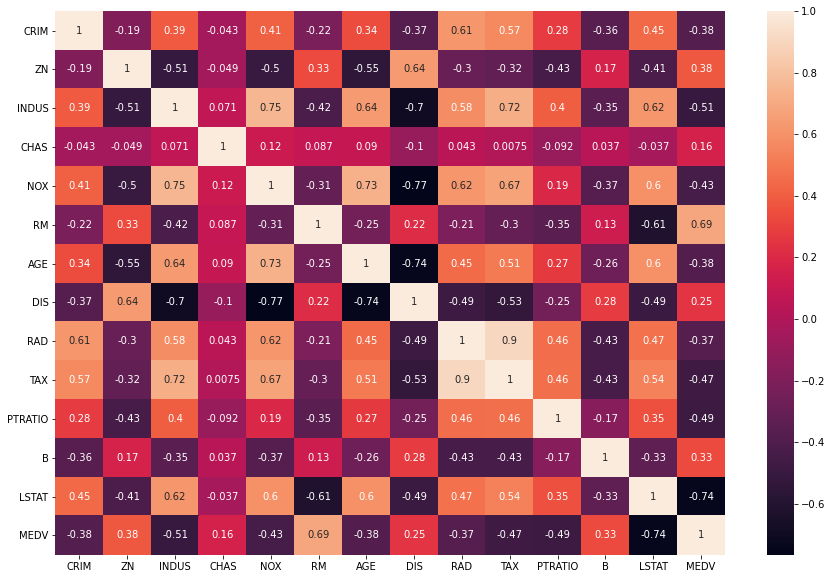

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(data=training_data.corr(), annot=True)
plt.show

<div dir="rtl">
در این قسمت پلات نقطه ای هر فیچر بر حسب MEDV کشیده شده است. همچنین heatmap نیز برای مقایسه‌ی راحت تر آورده شده است.
طبق شکل‌های بالا می‌توان فهمید که بیشترین ارتباط MEDV با فیچر‌های 
INDUS, RM, DIS, TAX, LSTAT 
است.
در بین این فیچرها RM, DIS با MEDV کوریلیشن مثبت دارند یعنی همناطور که در نمودار نقطه‌ای دیده می‌شود با افزایش مقدار هر کدام دیگری نیز زیاد می‌شود و سه فیچر باقی مانده برعکس این هستند یعنی با افزایش یکی دیگری کاهش میابد.
    </div>

In [7]:
XTrain = training_data.iloc[:,[9, 12, 5, 2, 7]]
XTest = testing_data.iloc[:,[9, 12, 5, 2, 7]]
matrix = np.asmatrix(XTrain.to_numpy())

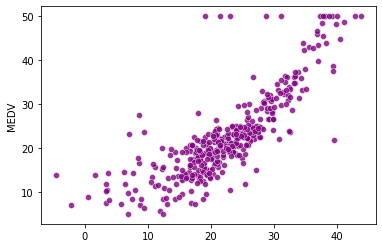

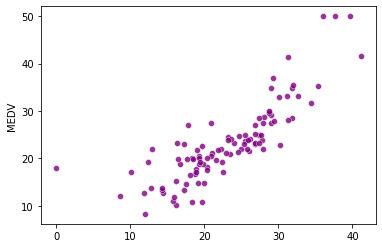

In [8]:
w1 = np.matmul(np.matmul(inv(np.matmul(matrix.transpose(), matrix)), matrix.transpose()), training_data['MEDV'].values)
y_predict1_test = np.asarray(np.matmul(XTest, w1.transpose())).reshape(-1)
y_predict1_train = np.asarray(np.matmul(XTrain, w1.transpose())).reshape(-1)
sns.scatterplot(x = y_predict1_train, y = training_data['MEDV'], color = "purple", alpha = 0.8)
plt.show()
sns.scatterplot(x = y_predict1_test, y = testing_data['MEDV'], color = "purple", alpha = 0.8)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

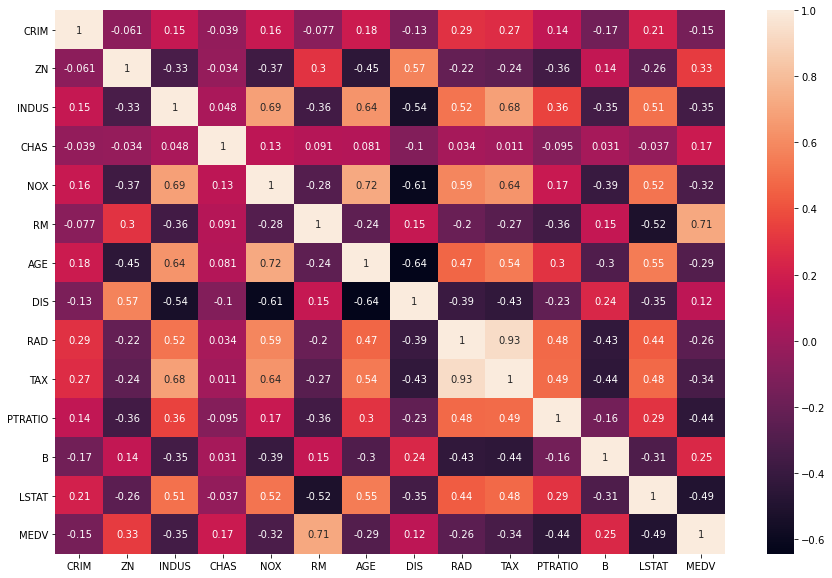

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(data=(np.square(training_data)).corr(), annot=True)
plt.show

<div dir="rtl">
با توجه به نمودار کشیده شده می‌خواهیم فیچرهای تاثیر گذار را پیدا کنیم. برای اینکار فیچر هایی را انتخاب می‌کنیم که کوریلیشن آن با MEDV نزدیک صفر نباشد.
با توجه به این مسئله فیجر های LSTAT, PTRATIO, RM که به توان دو رسیده اند برای این منظور انتخاب می‌شوند.

<ipython-input-10-252d19671a68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTrain['LSTAT2'] = np.square(training_data)['LSTAT']
<ipython-input-10-252d19671a68>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTrain['PTRATIO2'] = np.square(training_data)['PTRATIO']
<ipython-input-10-252d19671a68>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

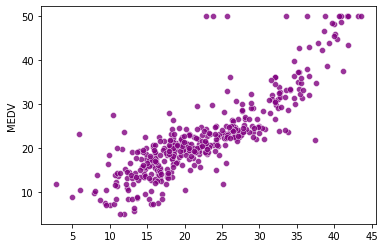

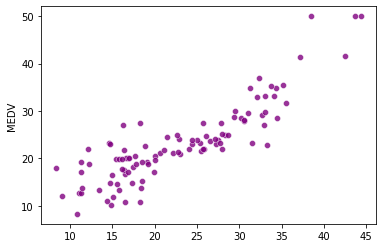

In [10]:
XTrain = training_data.iloc[:,[9, 12, 5, 2, 7]]
XTrain['LSTAT2'] = np.square(training_data)['LSTAT']
XTrain['PTRATIO2'] = np.square(training_data)['PTRATIO']
XTrain['RM2'] = np.square(training_data)['RM']
XTest = testing_data.iloc[:,[9, 12, 5, 2, 7]]
XTest['LSTAT2'] = np.square(testing_data)['LSTAT']
XTest['PTRATIO2'] = np.square(testing_data)['PTRATIO']
XTest['RM2'] = np.square(testing_data)['RM']
matrix = np.asmatrix(XTrain.to_numpy())
w2 = np.matmul(np.matmul(inv(np.matmul(matrix.transpose(), matrix)), matrix.transpose()), training_data['MEDV'].values)
y_predict2_test = np.asarray(np.matmul(XTest, w2.transpose())).reshape(-1)
y_predict2_train = np.asarray(np.matmul(XTrain, w2.transpose())).reshape(-1)
sns.scatterplot(x = y_predict2_train, y = training_data['MEDV'], color = "purple", alpha = 0.8)
plt.show()
sns.scatterplot(x = y_predict2_test, y = testing_data['MEDV'], color = "purple", alpha = 0.8)
plt.show()

In [11]:
XTrain = training_data.iloc[:,[9, 12, 5, 2, 7]]
XTest = testing_data.iloc[:,[9, 12, 5, 2, 7]]
index = np.random.randint(low=0, high=len(training_data), size=10)
X_trains = training_data.iloc[:,:13]
X_tests = testing_data.iloc[:,:13]
mus = training_data.iloc[index, :13]
for i in range(10):
    XTest[str(i)] = (np.exp(-np.square(norm((X_tests - mus.iloc[i]), axis= 1, ord = 2))) / 2)
    XTrain[str(i)] = (np.exp(-np.square(norm((X_trains - mus.iloc[i]), axis= 1, ord = 2))) / 2)

<ipython-input-11-c3986a8a1d83>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTest[str(i)] = (np.exp(-np.square(norm((X_tests - mus.iloc[i]), axis= 1, ord = 2))) / 2)
<ipython-input-11-c3986a8a1d83>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTrain[str(i)] = (np.exp(-np.square(norm((X_trains - mus.iloc[i]), axis= 1, ord = 2))) / 2)


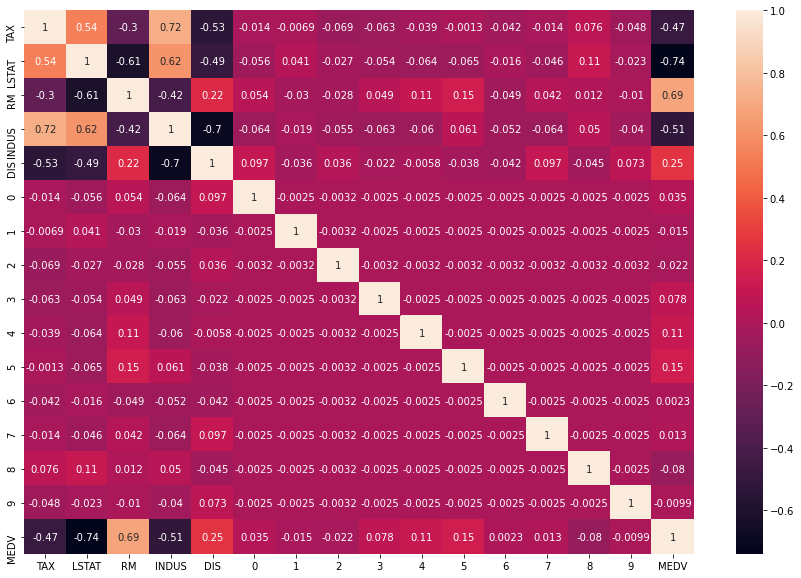

In [12]:
XTrain['MEDV'] = training_data['MEDV']
plt.figure(figsize=(15,10))
sns.heatmap(data=(XTrain).corr(), annot=True)
plt.show
XTrain = XTrain.iloc[:,:15]

<div dir="rtl">
    در این قسمت نیز مانند قبل heatmap را کشیدیم تا بتوانیم فیچرهای مربوط تر را انتخاب کنیم ولی همانطور که مشاهده می‌شود کوریلیشن تمام فیچرهای اضافه شده با MEDV کم است در نتیجه برای محاسبه‌ی نهایی از تمام آنها استفاده شد.
</div>

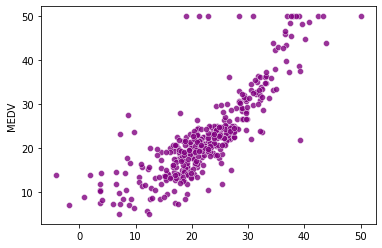

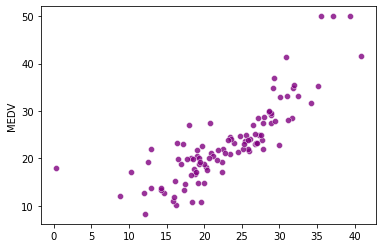

In [13]:
matrix = np.asmatrix(XTrain.to_numpy())
w3 = np.matmul(np.matmul(inv(np.matmul(matrix.transpose(), matrix)), matrix.transpose()), training_data['MEDV'].values)
y_predict3_test = np.asarray(np.matmul(XTest, w3.transpose())).reshape(-1)
y_predict3_train = np.asarray(np.matmul(XTrain, w3.transpose())).reshape(-1)
sns.scatterplot(x = y_predict3_train, y = training_data['MEDV'], color = "purple", alpha = 0.8)
plt.show()
sns.scatterplot(x = y_predict3_test, y = testing_data['MEDV'], color = "purple", alpha = 0.8)
plt.show()

In [14]:
print('MSE loss for test set')
print(sum(np.square(testing_data['MEDV'] - y_predict1_test))/len(testing_data))
print(sum(np.square(testing_data['MEDV'] - y_predict2_test))/len(testing_data))
print(sum(np.square(testing_data['MEDV'] - y_predict3_test))/len(testing_data))
print('\nMSE loss for train set')
print(sum(np.square(training_data['MEDV'] - y_predict1_train))/len(training_data))
print(sum(np.square(training_data['MEDV'] - y_predict2_train))/len(training_data))
print(sum(np.square(training_data['MEDV'] - y_predict3_train))/len(training_data))

MSE loss for test set
20.586320084602466
17.709078135186733
20.631121541166483

MSE loss for train set
30.187611370090384
24.243237190792648
29.621461286131154


<div dir="rtl">
    6 نمودار مربوط به هر روش در همان قسمت مربوطه کشیده شده است. نمودار اول نمودار y بدست آمده با استفاده از داده train و y اصلی داده‌ی train است و نمودار دوم y بدست آمده با استفاده از داده‌ی تست و y اصلی داده‌ی تست است.
<br>
در این بخش mse برای داده‌های تست محاسبه شد. همانطور که از نتایج میتوان مشاهده کرد مقدار ارور برای حالتی که تابع ما به توان 2 میرسید بهترین حالت را داشت.
در تابع سوم انحراف از معیار فیچرهای جدید 1 در نظر گرفته شده بود و تغییرات زیادی نداشت در نتیجه اعداد بدست آمده از آن بسیار کوچک بودند و موریشن آنها با MEDV نیز بسیار کوچک بود و نتیجه‌ی نهایی هم نشان می‌دهد که اضافه کردن این فیچرها تفاوت چشمگیری با مرحله‌ی اول ایجاد نکرد.
این نتیجه در داده‌های train نیز مشاهده می‌شود. در نتیجه می‌توان نتیجه گرفت به طور کلی برای این dataset به توان 2 رساندن فیچرها بهترین گزینه بود.
</div>